<a href="https://colab.research.google.com/github/lapshinaaa/applied-statistics-tasks/blob/main/AS5_KS_chi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Kolmogorov-Smirnov and Chi-squared tests
</center>

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Task 1 (Homogeneous Game)

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [2]:
killer1 = pd.read_csv("killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv("killer_time2.csv").hours_between_kill.values

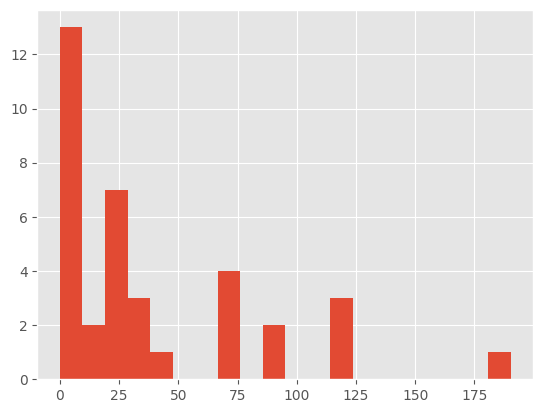

In [3]:
plt.hist(killer1, bins=20);

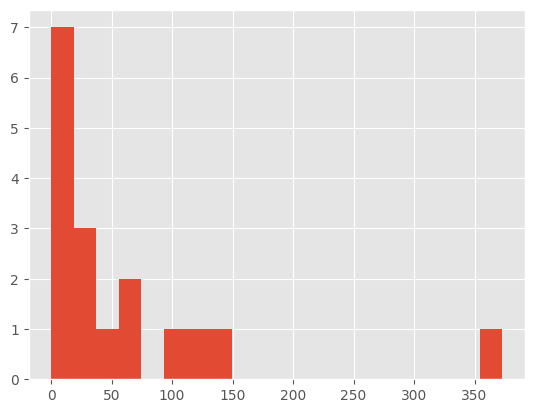

In [4]:
plt.hist(killer2, bins=20);

Мы хотим проверить гипотезу о том, что игры с точки зрения времени между убийствами прошли одинаково. Люди одинаково сильно были вовлечены в оба раунда игры и не потеряли энтузиазм.

__а) [1 балл]__ Проверьте гипотезу об однородности выборок с помощью [теста Манна-Уитни.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

**Hypotheses**

$$
H_0: F_{\text{round 1}} = F_{\text{round 2}}
$$

$$
H_1: F_{\text{round 1}} \ne F_{\text{round 2}}
$$


So I'm going to treat killer1 as control and killer2 as treatment.

In [3]:
u_stat, p_value = sts.mannwhitneyu(killer1, killer2, alternative='two-sided')

print(f"Mann–Whitney U statistic = {u_stat:.4f}, p-value = {p_value:.4f}")

Mann–Whitney U statistic = 269.0000, p-value = 0.4867


p-value is much greater than 0.05 -> There’s no significant difference in the distribution of time between kills.
→ Players behaved similarly; enthusiasm was stable.

__б) [1 балл]__ Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения.

In [4]:
ks_stat, p_val = sts.ks_2samp(killer1, killer2)

print(f"Kolmogorov-Smirnov statistic = {ks_stat:.4f}, p-value = {p_val:.4f}")

Kolmogorov-Smirnov statistic = 0.2190, p-value = 0.5453


p-value is much greater than 0.05 -> There’s no significant difference in the distribution of time between kills. → Players behaved similarly; enthusiasm was stable.

__в) [3 балла]__ Ответьте на вопросы:

- Какая гипотеза проверяется в тесте Манна-Уитни? Подходит ли этот тест для данной задачи?

__Ответ:__

- Какая гипотеза проверятеся в KS-тесте?

__Ответ:__

- Какой тест вы бы вырали для решения задачи?

__Ответ:__

## Задание 2 (парадокс Симпсона)

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований:

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$,
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы:

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин?
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство.

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона.

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а) [1 балл]__  Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин?  Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [ ]:
# your thoughts here
# (◕‿◕)♡

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [ ]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [ ]:
# your code here
# (￢_￢)

__б) [1 балл]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`.

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [ ]:
# your code here
# (￢_￢)

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [ ]:
# your code here
# (￢_￢)

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [ ]:
# your code here
# (￢_￢)

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [ ]:
# your code here
# (￢_￢)

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [ ]:
# your code here
# (￢_￢)

__в) [1 балл]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а)

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [ ]:
# your code here
# (￢_￢)

__г) [1 балл]__ Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [ ]:
# your code here
# (￢_￢)

__д) [1 балл]__  Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

In [ ]:
# your thoughts here
# (◕‿◕)♡

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде.

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.